<a href="https://colab.research.google.com/github/Raoolo/University/blob/main/MachineDeepLearning/Lab1/Es4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torchvision
from torch.utils.data import Dataset

In [69]:
class loadCIFAR(Dataset):
  def __init__(self, bs = 1):
    self.dataTrain = torchvision.datasets.CIFAR10(root='sample_data/', download=True, transform=torchvision.transforms.ToTensor())
    self.dataTest = torchvision.datasets.CIFAR10(root='sample_data/', download=True, train=False, transform=torchvision.transforms.ToTensor())
    self.trainLoader = torch.utils.data.DataLoader(self.dataTrain, batch_size=bs, shuffle=True)
    self.testLoader = torch.utils.data.DataLoader(self.dataTest, batch_size=bs, shuffle=True)

  def __len__(self):
    return len(self.dataTrain)    #non serve a nulla per ora?


In [70]:
cif = loadCIFAR()

Files already downloaded and verified
Files already downloaded and verified


In [71]:
trainData = cif.dataTrain
testData = cif.dataTest
trainLoader = cif.trainLoader
testLoader =  cif.testLoader

In [72]:
trainData, testData, trainLoader, testLoader

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: sample_data/
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: sample_data/
     Split: Test
     StandardTransform
 Transform: ToTensor(), <torch.utils.data.dataloader.DataLoader at 0x7fdb9b487df0>, <torch.utils.data.dataloader.DataLoader at 0x7fdb9dc54550>)

Plot some images

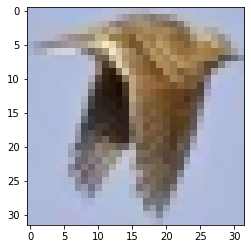

In [73]:
import numpy as np
import matplotlib.pyplot as plt
toPlot = trainData[123][0].numpy()
plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes


In [74]:
labels_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5:
"dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

Plot random pics

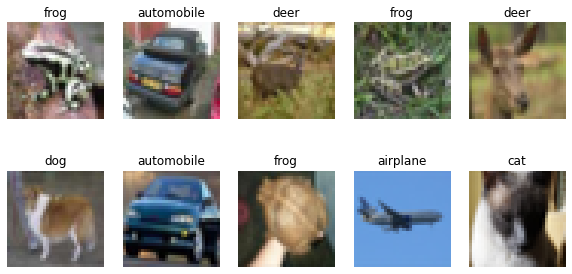

In [75]:
figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainData), size=(1,)).item()
    img, label = trainData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    toPlot = img.numpy()
    plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes
plt.show()

Plot a photo for each category

In [ ]:
figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
labels = []
for i in range(1, cols * rows + 1):
  for data in trainLoader:
    